# MDS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.manifold import MDS
import numpy as np
from matplotlib import pyplot as plt

### Dataset de ciudades de Europa

Una vez obtenida esta nueva matriz de distancias de todos los puntos contra
todos, simplemente se aplica MDS con k = 2 para obtener la representación de nuestros puntos en dos dimensiones respectivamente.

In [3]:
df = pd.read_csv("europa.csv")

In [4]:
df.head(5)

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Hook of Holland,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,3030,4532,2753,3949,2865,2282,2179,3000,817,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1490,1305,645,636,521,1014,1365,1033,1460,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,172,2084,690,1558,1011,925,747,285,1511,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,330,2052,739,1550,1059,1077,977,280,1662,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,731,1827,789,1347,1101,1209,1160,340,1794,1588


In [5]:
## Nos quedamos con un array que contiene los nombres de las ciudades, para el plot
city = np.array(df["city"])

In [6]:
city

array(['Athens', 'Barcelona', 'Brussels', 'Calais', 'Cherbourg',
       'Cologne', 'Copenhagen', 'Geneva', 'Gibraltar', 'Hamburg',
       'Hook of Holland', 'Lisbon', 'Lyons', 'Madrid', 'Marseilles',
       'Milan', 'Munich', 'Paris', 'Rome', 'Vienna'], dtype=object)

In [7]:
## Genero la matriz de distancias
D = np.array(df.iloc[:, 1:]) 

In [8]:
D

array([[   0, 3313, 2963, 3175, 3339, 2762, 3276, 2610, 4485, 2977, 3030,
        4532, 2753, 3949, 2865, 2282, 2179, 3000,  817, 1991],
       [3313,    0, 1318, 1326, 1294, 1498, 2218,  803, 1172, 2018, 1490,
        1305,  645,  636,  521, 1014, 1365, 1033, 1460, 1802],
       [2963, 1318,    0,  204,  583,  206,  966,  677, 2256,  597,  172,
        2084,  690, 1558, 1011,  925,  747,  285, 1511, 1175],
       [3175, 1326,  204,    0,  460,  409, 1136,  747, 2224,  714,  330,
        2052,  739, 1550, 1059, 1077,  977,  280, 1662, 1381],
       [3339, 1294,  583,  460,    0,  785, 1545,  853, 2047, 1115,  731,
        1827,  789, 1347, 1101, 1209, 1160,  340, 1794, 1588],
       [2762, 1498,  206,  409,  785,    0,  760, 1662, 2436,  460,  269,
        2290,  714, 1764, 1035,  911,  583,  465, 1497,  937],
       [3276, 2218,  966, 1136, 1545,  760,    0, 1418, 3196,  460,  269,
        2971, 1458, 2498, 1778, 1537, 1104, 1176, 2050, 1455],
       [2610,  803,  677,  747,  853, 166

In [9]:
print(D.shape)

(20, 20)


In [10]:
## Aplicamos MDS para transformar la matriz de distancias
# Puede tener cualquier cantidad de componentes, la diferencia es que con 1 2 o 3 se pueden visualizar en un scatter plot
Xr = MDS(dissimilarity='precomputed', n_components=2,random_state=2).fit_transform(D)

In [11]:
Xr

array([[ 2597.46325228,   840.0788211 ],
       [   -5.98263442,  -906.04275633],
       [ -335.38226072,   368.64186963],
       [ -514.56980952,   294.07306384],
       [ -720.19005401,    17.73979862],
       [ -254.91344851,   600.31532805],
       [ -519.33989204,  1258.75963095],
       [  207.3625179 ,  -135.39970184],
       [ -623.30285006, -1910.33321331],
       [ -302.69523893,   981.46090777],
       [ -442.91711423,   581.64336392],
       [-1081.71747374, -1568.84811489],
       [   22.76707805,  -195.25346301],
       [ -627.67514385, -1215.14387593],
       [  198.75351266,  -461.06944029],
       [  483.58574275,    28.76893277],
       [  378.74475363,   481.64512756],
       [ -334.90131075,    86.28898861],
       [ 1181.55013829,    35.65435761],
       [  693.36023522,   817.02037515]])

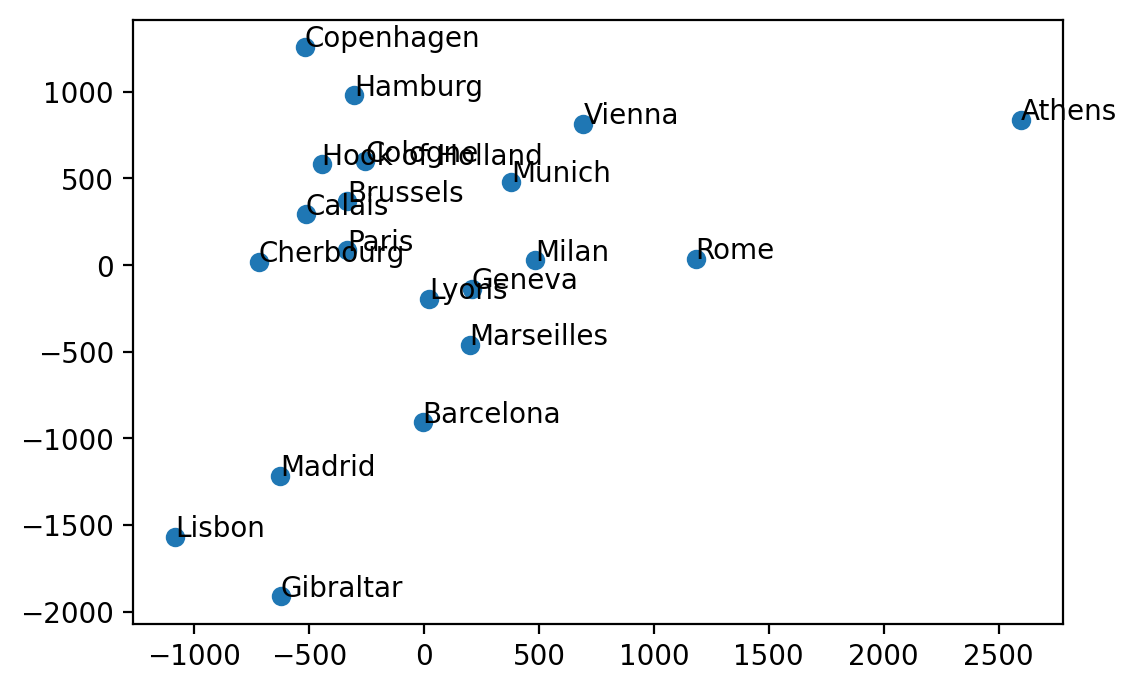

In [12]:
fig,ax = plt.subplots(dpi=200)
ax.scatter(Xr[:, 0], Xr[:, 1], marker='o')
for i in range(len(city)):
    ax.text(Xr[i, 0], Xr[i, 1], city[i], fontsize=10)